# 2/15/20
_____
Основная проблема в том, что произведение эффективности регистрации на радпоправку не сходится при расчёте двух случаев: событий только с мягкими фотонами и всех событий

Эту проблему необходимо решать

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(13,7)}, font_scale=1.5)
plt.style.use('seaborn-whitegrid')

$$\varepsilon_{reg} (1+\delta) = \frac{N_{passed}}{N_{total}} (1+\delta)$$
Так как $N_{passed}$ одинаково для двух случаев, то его можно сократить и проверять следующее равенство:
$$\frac{(1+\delta_{all})}{N_{all\ total}} = \frac{(1+\delta_{soft})}{N_{soft\ total}} $$

Сначала построю картинку, которая у меня уже получилась

Проверка радпоправки на $\phi$-мезоне

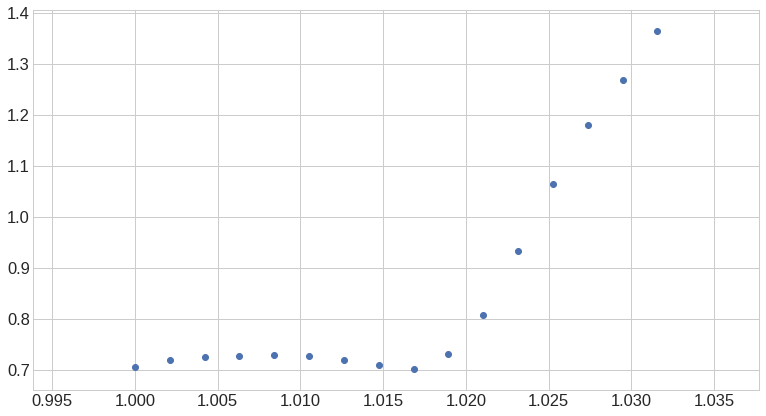

In [57]:
plt.scatter(data=rad_all.loc[:15], x='energy', y='radcor')
# plt.scatter(data=rad_soft.loc[:15], x='energy', y='radcor')

In [2]:
rad_soft = pd.read_csv('outputs/data/radcors_soft.dat', header=None, names=['energy', 'radcor']).sort_values(by='energy')
rad_all = pd.read_csv('outputs/data/radcors_all.dat', header=None, names=['energy', 'radcor']).sort_values(by='energy')

data = pd.read_csv('../../outputs/model_new_v6/soft_ph.csv').rename({'lum':'Nsoft'}, axis=1).assign(Nall=20000)

In [3]:
cs11a = pd.read_csv('../../outputs/cross_sections/vis_11_model_new_v6_all.csv')
cs11a['rad'] = np.interp(cs11a.Emean*2e-3, rad_all.energy, rad_all.radcor)
cs11a['mult'] = cs11a.rad*cs11a.RegEff
cs11a['mult_err'] = cs11a.rad*cs11a.RegErr

cs11s = pd.read_csv('../../outputs/cross_sections/vis_11_model_new_v6_soft.csv')
cs11s['rad'] = np.interp(cs11s.Emean*2e-3, rad_soft.energy, rad_soft.radcor)
cs11s['mult'] = cs11s.rad*cs11s.RegEff
cs11s['mult_err'] = cs11s.rad*cs11s.RegErr

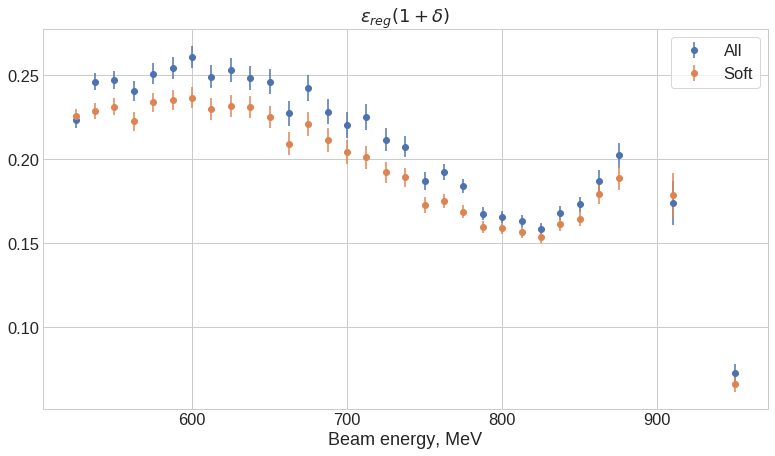

In [19]:
plt.errorbar(cs11a.name, cs11a.mult, yerr=cs11a.mult_err, fmt='o', label='All')
plt.errorbar(cs11s.name, cs11s.mult, yerr=cs11s.mult_err, fmt='o', label='Soft')
plt.title('$\\varepsilon_{reg}(1+\delta)$')
plt.xlabel('Beam energy, MeV')
plt.legend(frameon=True);

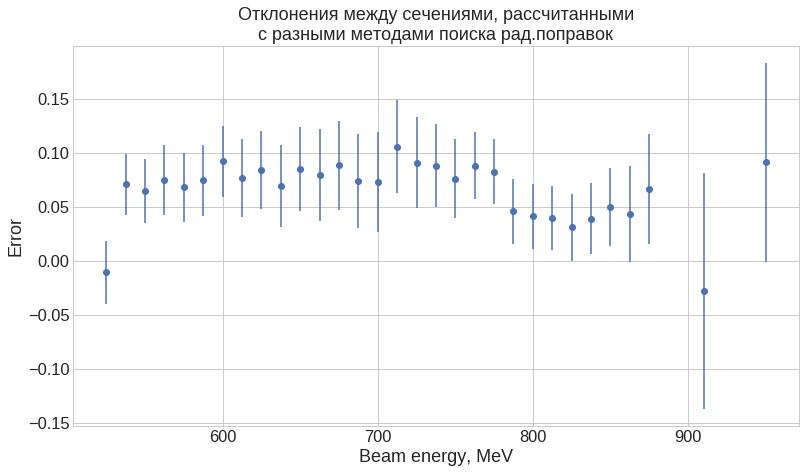

In [15]:
substr = (cs11a.mult - cs11s.mult)/cs11a.mult
substr_err = (cs11s.mult/cs11a.mult)*np.sqrt( (cs11a.mult_err/cs11a.mult)**2 + (cs11s.mult_err/cs11s.mult)**2 )
plt.errorbar(cs11a.name, substr , yerr=substr_err, fmt='o', label='');
plt.title('Отклонения между сечениями, рассчитанными\nс разными методами поиска рад.поправок');
plt.xlabel('Beam energy, MeV');
plt.ylabel('Error');